# **LG Customer Segmentation Analysis**
LG Corporation, a global leader in consumer electronics, faced challenges in optimizing marketing strategies across a diverse customer base. Despite leveraging basic analytics, their model lacked real-time insights and could not adapt to shifting consumer preferences. To solve this, LG decided to implement a data-driven customer segmentation strategy, aimed at identifying distinct customer groups and tailoring marketing, product pricing, and engagement strategies accordingly.

### **Objective:**
The primary goal of this project was to:
- Identify distinct customer segments based on sales, demographics, and preferences.
- Improve marketing personalization and product targeting.
- Optimize product pricing by understanding customer behavior and preferences.

This would help LG align its business strategy with real-time market insights and drive improved customer retention, satisfaction, and sales efficiency.

### **Explanation of Learning Type:**
This is an unsupervised learning task — we do not have a target variable.
We are using clustering to explore hidden patterns and group similar customers together.
The outcome is the Cluster label, which segments customers for better marketing decisions.


### **Understanding the Learning Type:**
Unsupervised learning is used when we do not have predefined labels or outcomes.
In this project, we are not predicting churn or sales — we are discovering customer segments
based on purchasing patterns and preferences. These insights can then be used for targeted marketing,
promotions, or product bundling strategies.

# ============================================
# Step 1: Import Libraries
# ============================================
Import necessary libraries for data analysis and clustering

In [1]:
 # Core libraries
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical operations

# Visualization libraries
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns            # For advanced visualizations

# Utility
import joblib                    # For saving/loading models or scalers
import os                        # For interacting with the file system

# Scikit-learn modules
from sklearn.preprocessing import StandardScaler     # For feature scaling
from sklearn.cluster import KMeans                   # For KMeans clustering
from sklearn.metrics import silhouette_score         # For evaluating clustering performance
from sklearn.decomposition import PCA                # For dimensionality reduction and visualization

In [2]:
# Set visual style
sns.set(style="whitegrid")

In [ ]:
# Create directories for outputs
os.makedirs("myoutput", exist_ok=True)


# ============================================
# Step 2: Load Dataset
# ============================================
We load the dataset downloaded from Kaggle, which contains customer transaction information related to consumer electronics:
We preview the first few rows to understand the data structure.


In [4]:
data = ("consumer_electronics_sales_data.csv")

# Load the dataset
df = pd.read_csv(data)

# Display first 5 rows to understand structure
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [5]:
# Display last 5 rows
df.tail()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
8995,14869,Smart Watches,Samsung,1041.149163,36,1,16,4,0
8996,14870,Smartphones,Samsung,1485.694311,57,0,5,1,1
8997,14871,Headphones,Samsung,2887.369597,28,0,18,4,0
8998,14872,Tablets,HP,1490.453964,38,0,4,2,1
8999,14873,Smartphones,Sony,2315.583087,62,0,15,2,1


In [6]:
# Basic information
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (9000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [7]:
df.describe()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,10373.500000,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444
std,2598.220545,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593
min,5874.000000,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000
25%,8123.750000,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000
50%,10373.500000,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000
75%,12623.250000,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000
max,14873.000000,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000


# ============================================
# Step 3: Data Cleaning
# ============================================

### 3a. Drop irrelevant columns

We remove columns that do not help in segmenting customers. For example, ProductID.
This is because ProductID is a unique identifier and doesn't contribute to grouping customers.

In [8]:
# Remove columns that are not useful for segmentation (e.g., ProductID)
if "ProductID" in df.columns:
    df.drop(columns=["ProductID"], inplace=True)

In [9]:
# Comfirm columns
df.columns

Index(['ProductCategory', 'ProductBrand', 'ProductPrice', 'CustomerAge',
       'CustomerGender', 'PurchaseFrequency', 'CustomerSatisfaction',
       'PurchaseIntent'],
      dtype='object')

### 3b Check for missing values and Duplicates

This helps us understand data completeness. If any values are missing, we would address them here.

In [10]:
# Show missing values
missing = df.isnull().sum()
# print("Missing values:\n", missing[missing > 0])

missing

ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

In [11]:
# Check duplicates
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


# ============================================
# Step 4: Convert Categorical Features to Category Type
# ============================================
### Convert string columns (e.g., 'product category' and 'ProductBrand' columns) to categorical data types.
- This helps reduce memory usage and signals that these columns contain discrete categories.
- It's also a good practice before applying encoding techniques like one-hot encoding.


In [12]:
df['ProductCategory'] = df['ProductCategory'].astype('category')
df['ProductBrand'] = df['ProductBrand'].astype('category')

# ============================================
# Step 5: Encode Categorical Variables
# ============================================
#### One-Hot Encoding:
- Convert categorical variables into numerical format using one-hot encoding.
- This creates binary (0/1) columns for each category, allowing algorithms to process them.
- 'drop_first=True' avoids multicollinearity by dropping the first category in each feature


In [13]:
# Use one-hot encoding to convert categorical variables into numerical
encoded_df = pd.get_dummies(df, drop_first=True)
print("\nEncoded DataFrame Preview:")
print(encoded_df.head())



Encoded DataFrame Preview:
   ProductPrice  CustomerAge  CustomerGender  PurchaseFrequency  \
0    312.949668           18               0                  2   
1    980.389404           35               1                  7   
2   2606.718293           63               0                  1   
3    870.395450           63               1                 10   
4   1798.955875           57               0                 17   

   CustomerSatisfaction  PurchaseIntent  ProductCategory_Laptops  \
0                     1               0                    False   
1                     2               1                    False   
2                     5               1                    False   
3                     3               1                    False   
4                     3               0                    False   

   ProductCategory_Smart Watches  ProductCategory_Smartphones  \
0                          False                         True   
1                           Tr

# ============================================
# Step 6: Feature Scaling
# ============================================
#### Standardize the features to bring them to a similar scale.
- This ensures that variables with larger ranges (e.g., income, age) don't dominate those with smaller ranges.
- StandardScaler transforms the data to have a mean of 0 and a standard deviation of 1.
- This step is essential before applying distance-based algorithms like KMeans.


In [14]:
# Standardize the features to bring them to a similar scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_df)

# ============================================
# Step 7: Determine Optimal Number of Clusters Using Elbow & Silhouette Methods
# ============================================
We use two popular methods to find the best number of customer segments:
- Elbow Method (visualizes the drop in "inertia" or within-cluster error).
- Silhouette Score (evaluates how similar each point is to its cluster vs. other clusters).

Both help us decide how many clusters (k) are meaningful.


In [15]:
# We test values of k from 2 to 10 and evaluate using inertia (SSE) and silhouette score
inertia = []
silhouette_scores = []
k_range = range(2, 11)

In [16]:
# Use Elbow Method and Silhouette Score to determine optimal number of clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))


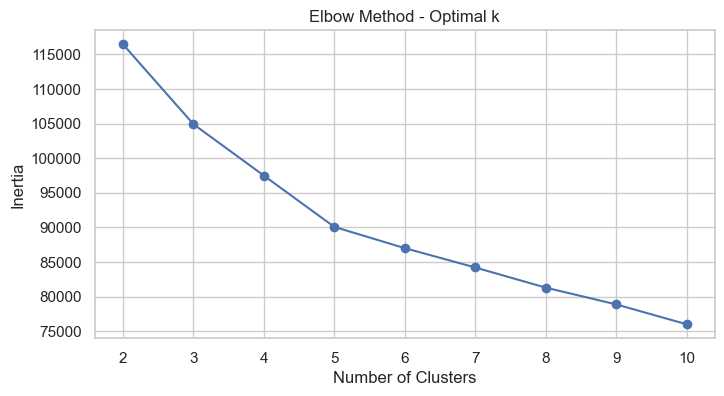

In [17]:
# Plot Elbow Curve (SSE vs. k)
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.savefig("myoutput/Elbow_Curve.png")  # save the plot
plt.show()

### Elbow Method Interpretation:
- The x-axis shows the number of clusters (k), from 2 to 10.
- The y-axis shows inertia (within-cluster sum of squares), which measures how tightly grouped the clusters are.
- As the number of clusters increases, inertia decreases but the rate of improvement slows down.
- The "elbow" point appears around k = 4, where the curve starts to flatten.
 
##### Conclusion: 
- The optimal number of clusters is likely to be 4, balancing model simplicity and clustering performance.


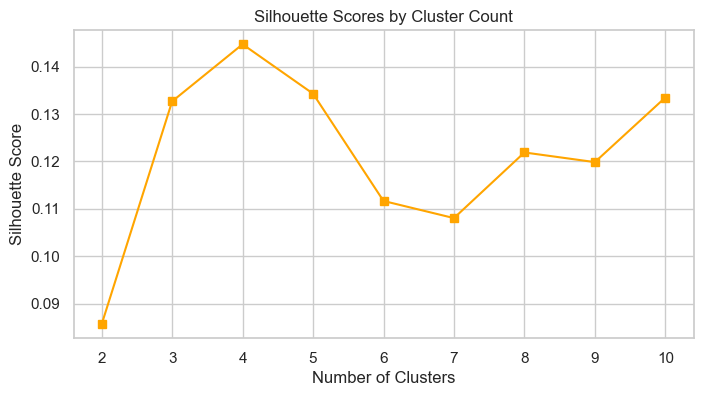

In [18]:
# Plot Silhouette Scores vs. k
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='s', color='orange')
plt.title('Silhouette Scores by Cluster Count')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.savefig("myoutput/Silhouette_Scores.png")  # save the plot
plt.show()

### Silhouette Score Interpretation:
- The x-axis shows the number of clusters (k), from 2 to 10.
- The y-axis shows the Silhouette Score, which measures how well-separated and cohesive the clusters are (higher is better).
- The silhouette score peaks at k = 4, indicating the most distinct and well-defined clustering structure.
- Scores decline after 4, with the lowest at k = 7, suggesting poor separation at that point.

#### Conclusion: 
- The optimal number of clusters is likely 4, based on the highest silhouette score and best cluster cohesion.


# ============================================
# Step 8: Fit Final K-Means Model
# ============================================
### Final Clustering Step:
- Based on the Elbow and Silhouette plots, we select the optimal number of clusters (k = 4),
- which balances model simplicity with clustering quality.
- We then apply KMeans clustering with k = 4 to the scaled dataset.
- The resulting cluster labels are added to the encoded dataset for further analysis or visualization.

In [19]:
# Based on Elbow and Silhouette plots, we choose an appropriate k (e.g., 4)
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(scaled_data)

# Append the cluster labels to the original encoded dataset
encoded_df['Cluster'] = cluster_labels

Each row in the dataset now has a Cluster value (0, 1, 2, or 3).

# ============================================
# Step 9: Analyze Cluster Profiles
# ============================================

In [20]:
# Group the data by cluster label and compute mean values for each feature
cluster_profile = encoded_df.groupby('Cluster').mean().round(2)
print("\nCluster Profiles:")
print(cluster_profile)


Cluster Profiles:
         ProductPrice  CustomerAge  CustomerGender  PurchaseFrequency  \
Cluster                                                                 
0             1517.58        42.77            0.49              10.14   
1             1549.16        43.65            0.52               9.98   
2             1545.76        43.49            0.51               9.99   
3             1494.67        43.46            0.51              10.11   

         CustomerSatisfaction  PurchaseIntent  ProductCategory_Laptops  \
Cluster                                                                  
0                        2.99            0.55                     0.84   
1                        3.03            0.58                     0.00   
2                        2.98            0.56                     0.00   
3                        2.98            0.58                     0.00   

         ProductCategory_Smart Watches  ProductCategory_Smartphones  \
Cluster                   

### Cluster Profiles Summary
This shows the average behavior of customers in each group, what they typically buy, how much they spend, etc.

#### Cluster 0: Laptop Lovers
- Highest average price: \$1,517.58  
- Older customers (avg. age: 42.77), mostly male (49% female)  
- High purchase frequency: 10.14  
- Moderate satisfaction: 2.99  
- Most likely to buy: 55% purchase intent  
- Strong preference for laptops (84%)  
- Brands: HP (17%), Samsung (18%), Other Brands (33%)  

#### Cluster 1: Smart Watch Enthusiasts
- Highest average price: \$1,549.16  
- Slightly older (avg. age: 43.65), 52% female  
- Purchase frequency: 9.98  
- Satisfaction: 3.03 (highest)  
- Purchase intent: 58%  
- Dominated by smart watches (72%)  
- Brands: HP (28%), Samsung (15%)  

#### Cluster 2: Tablet Seekers
- Avg. price: \$1,545.76  
- Avg. age: 43.49, 51% female  
- Purchase frequency: 9.99  
- Satisfaction: 2.98  
- Purchase intent: 56%  
- Strong preference for tablets (84%)  
- Brands: Sony (33%), HP (17%)  

#### Cluster 3: Smartphone Loyalists
- Lowest average price: \$1,494.67  
- Avg. age: 43.46, 51% female  
- Purchase frequency: 10.11  
- Satisfaction: 2.98  
- Purchase intent: 58%  
- Dominated by smartphones (84%)  
- Brands: Samsung (33%), HP (17%)  


# ============================================
# Step 10: Visualize clusters using PCA (2D projection)
# ============================================

PCA (Principal Component Analysis) reduces high-dimensional data to 2D so we can plot it:
- Each dot represents a customer.
- Dots with the same color belong to the same segment.


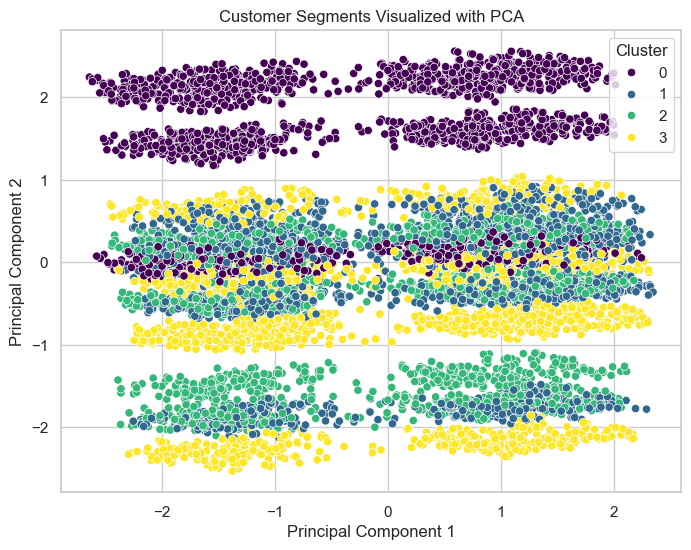

In [21]:
# We reduce the dimensionality of the data to 2 components for easy plotting and understanding
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.savefig("myoutput/Customer_Segment_by_PCA.png")  # save the plot
plt.show()


### Cluster Interpretation Summary

Each cluster represents a distinct customer segment based on product preferences, demographics, and behavior. Here's a breakdown:

---

#### Cluster 0 (Purple in PCA Plot)
- **Product Focus**: Primarily **Laptops** (84%)
- **Demographics**: Average age: 42.8, gender mix: 50/50
- **Behavior**: High purchase frequency (10.14), moderate satisfaction (2.99), moderate intent (0.55)
- **Brand Preference**: Mixed, with some preference for **Samsung (18%)** and **Other Brands (33%)**
- **Insight**: Likely tech-savvy professionals who frequently buy laptops and are moderately satisfied.

---

#### Cluster 1 (Blue)
- **Product Focus**: Mostly **Smart Watches** (72%)
- **Demographics**: Slightly older (43.7), gender-balanced
- **Behavior**: Slightly lower frequency (9.98), highest satisfaction (3.03), highest intent (0.58)
- **Brand Preference**: Leans toward **HP (28%)**
- **Insight**: Possibly health-conscious or fitness-oriented users with strong purchase intent and satisfaction.

---

#### Cluster 2 (Green)
- **Product Focus**: Dominantly **Tablets** (84%)
- **Demographics**: Similar age and gender to others
- **Behavior**: Moderate satisfaction (2.98), intent (0.56), frequency (9.99)
- **Brand Preference**: Strong preference for **Sony (33%)**
- **Insight**: Likely students or casual users preferring tablets, possibly for media or reading.

---

#### Cluster 3 (Yellow)
- **Product Focus**: Primarily **Smartphones** (84%)
- **Demographics**: Similar to others
- **Behavior**: High frequency (10.11), good satisfaction (2.98), high intent (0.58)
- **Brand Preference**: Strong **Samsung** preference (33%)
- **Insight**: Likely mobile-first users, possibly younger professionals or digital natives.

---

### Overall Takeaway
The PCA plot confirms that these clusters are **well-separated**, meaning the segmentation is meaningful. Each group has distinct product preferences and behavioral traits, which can guide **targeted marketing strategies**.


# ============================================
# Step 11: Export Clustered Data for Business Use
# ============================================
We save the clustered dataset to a new CSV file. This file can be used for dashboards, marketing automation, or other business tools.

In [22]:
# Save results to CSV for use in dashboards or further analysis
encoded_df.to_csv("segmentation_results.csv", index=False)

# To save the trained model and scaler

In [23]:
import pickle

# Save model
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

# Save scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
